In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [39]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [2]:
'''your code here'''
# I know you said I could find the answer w/ a single command but personally I don't know if I know how to but anyway here goes
len(titanic_df)

891

In [4]:
(len(titanic_df.query('Sex==1'))/len(titanic_df))

0.6475869809203143

In [7]:
titanic_df.describe() # ok nevermind i think this might be what you meant when you said you could find everything using a single command laugh out loud
#either that or i'm misunderstanding how averages work with 0s and 1s

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,10.000000


###### Your written answer:

 - 891
 - 64.76%
 - 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [13]:
'''your code here'''
len(titanic_df.query('Sex==0 and Survived==1'))/len(titanic_df.query('Sex==0'))

0.7420382165605095

In [14]:
len(titanic_df.query('Sex==1 and Survived==1'))/len(titanic_df.query('Sex==1'))

0.18890814558058924

Your written answer:

 - 74.2%
 - 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [28]:
'''your code here'''
grouped_df=titanic_df.groupby(['Pclass']).agg(
    num_tickets=('Pclass', 'size'),# Count the number of passengers per class
    survivorship=('Survived', 'mean') # Calculate the survival rate per class
)
grouped_df #shows pct of each class that survived (62% in 1, 47% in 2, and 24% in 3)

,num_tickets,survivorship
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [30]:
#calcing ticket pct from raw numbers
grouped_df['ticket_pct']=(grouped_df['num_tickets']/len(titanic_df)) *100
grouped_df #now we have the pct make up of ticket class in the ticket_pct column (24% 1, 20% 2, 55% 3)

,num_tickets,survivorship,ticket_pct
Pclass,,,
1,216,0.629630,24.242424
2,184,0.472826,20.650954
3,491,0.242363,55.106622


Your written answer:

 - Class 1 
    - % tickets: 24
    - % survivorship: 63
- Class 2 
    - % tickets: 20
    - % survivorship: 47
- Class 3
    - % tickets: 55
    - % survivorship: 24


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [34]:
titanic_df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [123]:
'''Your code here'''
#side note i wish i could highlight things in the instruction text
survived_df=titanic_df.query('Survived==1')
died_df=titanic_df.query('Survived==0')

col_to_keep= ['Age', 'Name', 'Sex']


survived_df=survived_df[col_to_keep]
died_df=died_df[col_to_keep]

len(survived_df.query('Sex==0'))

233

Text(0.5, 0.98, 'Distribution of Age by Sex and Survivorship Among Titanic Passengers')

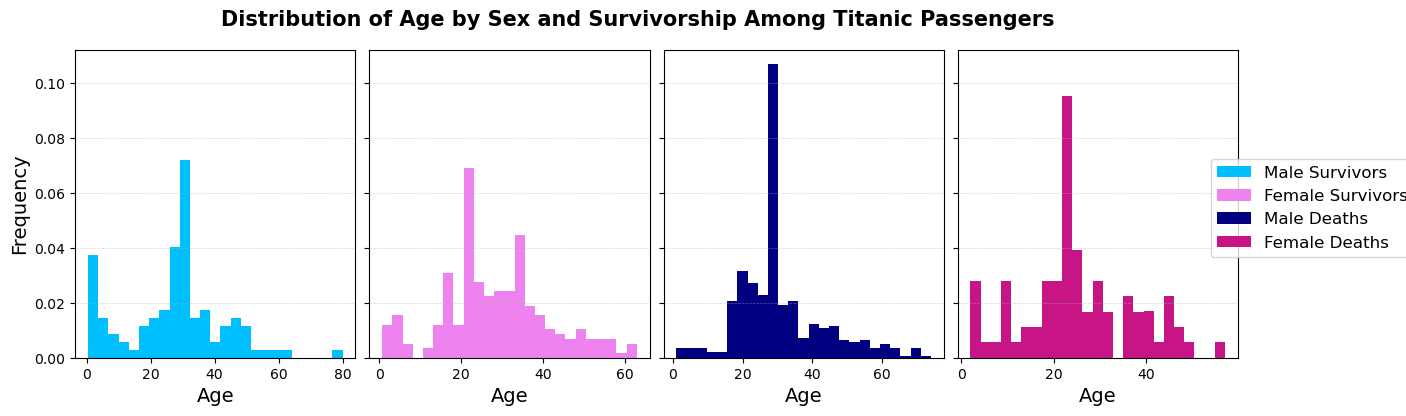

In [92]:
#distribution of age by sex and survivorship
# (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky).
fig, ax = plt.subplots(1,4, figsize = (15,4), sharey = True)
plot_opts = dict(bins = 25,
                 density=True,
                 histtype='stepfilled'
                )

#i know that theres a way to do this easier w/ a for loop but I was having trouble with it so i'm doing it manually
ax[0].hist(survived_df.query('Sex==1')['Age'], **plot_opts,  label='Male Survivors', color='deepskyblue')
ax[1].hist(survived_df.query('Sex==0')['Age'], **plot_opts,  label='Female Survivors', color='violet')
ax[2].hist(died_df.query('Sex==1')['Age'],  **plot_opts, label='Male Deaths', color='navy')
ax[3].hist(died_df.query('Sex==0')['Age'], **plot_opts,  label='Female Deaths', color='mediumvioletred')


plots=[0,1,2, 3]
for x in plots: # but never fear i got the for loop here
    ax[x].set_xlabel('Age', fontsize=14)
    ax[x].grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

ax[0].set_ylabel('Frequency', fontsize=14)
fig.legend(loc='center right', borderaxespad=-0.5, ncol = 1, fontsize=12)
fig.subplots_adjust(wspace=0.05) 
fig.suptitle('Distribution of Age by Sex and Survivorship Among Titanic Passengers', fontsize=15, fontweight='bold')
#personally i think this figure is easy to interpret and i hope you do too :]

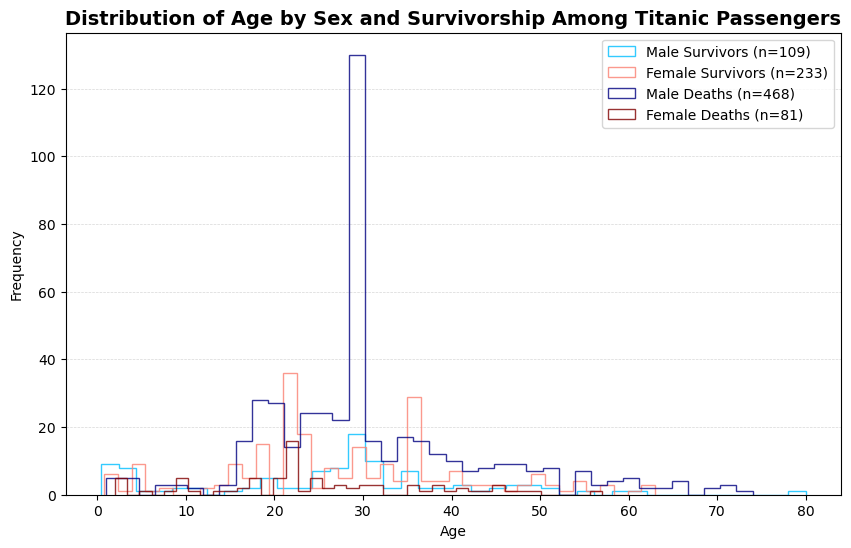

In [124]:
#i've realized i may have misinterpreted the words "on the same axes" so heres another version of the figure. 
#is it harder to read? yes, is it a little ugly? also yes
fig, ax = plt.subplots(1,1, figsize = (10,6))
plot_opts = dict(bins = 40,
                 density=False,
                 histtype='step', #wasbouncing back and forth on if it should be filled but i think its less muddy like this
                 alpha=0.8
                )

ax.hist(survived_df.query('Sex==1')['Age'], **plot_opts,  label='Male Survivors (n=109)', color='deepskyblue')
ax.hist(survived_df.query('Sex==0')['Age'], **plot_opts,  label='Female Survivors (n=233)', color='salmon')
ax.hist(died_df.query('Sex==1')['Age'],  **plot_opts, label='Male Deaths (n=468)', color='navy')
ax.hist(died_df.query('Sex==0')['Age'], **plot_opts,  label='Female Deaths (n=81)', color='maroon')


ax.set_ylabel('Frequency')
ax.set_xlabel('Age')
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
ax.legend()
ax.set_title('Distribution of Age by Sex and Survivorship Among Titanic Passengers', fontsize=14, fontweight='bold')
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [ ]:
'''Your code here'''

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 